# Investigating Stellar Color and Brightness with Hubble Images

Two easily observable properties of stars, color and brightness, can tell us a lot about how stars change as they evolve throughout their lives. In this tutorial we'll be walking through the steps that astronomers take to make measurements of the brightnesses and colors of stars.

The embedded video demonstrates how the colors and brightnesses of stars correspond to real physical properties.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/PsS80huL47c"\
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope;\
picture-in-picture" allowfullscreen></iframe>')

We're going to be using a pre-prepared dataset from a Hubble Space Telescope project called the [HST UV Globular Cluster Survey ("HUGS")](https://archive.stsci.edu/prepds/hugs/). We'll be looking at the globular cluster [NGC5053](https://en.wikipedia.org/wiki/NGC_5053).

<img src="data/NGC5053_color.jpg">

First, let's import the packages we need to get started. We're going to be getting our data from FITS files using Astropy's [FITS module](http://docs.astropy.org/en/stable/io/fits/), and analyzing it using [SEP](https://sep.readthedocs.io/en/stable/), a package designed to detect and measure sources* in astronomical images. We'll be using the Astropy `Table` module to work with the quantities that we measure from our images.

*The word "source" is used in observational astronomy to denote anything that puts out light; for our purposes here it means stars and galaxies.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import sep

## Working with astronomical image data

Here we read in the image from one of our data files and take a quick look at it.

In [3]:
# read the data into an in-memory array we can do calculations on
data_blue = fits.getdata('data/NGC5053_blue.fits').byteswap().newbyteorder()



The `byteswap().newbyteorder()` part above is only necessary because we're using SEP, which has some specific preferences for handling image data. If you're not using SEP you can leave it out.

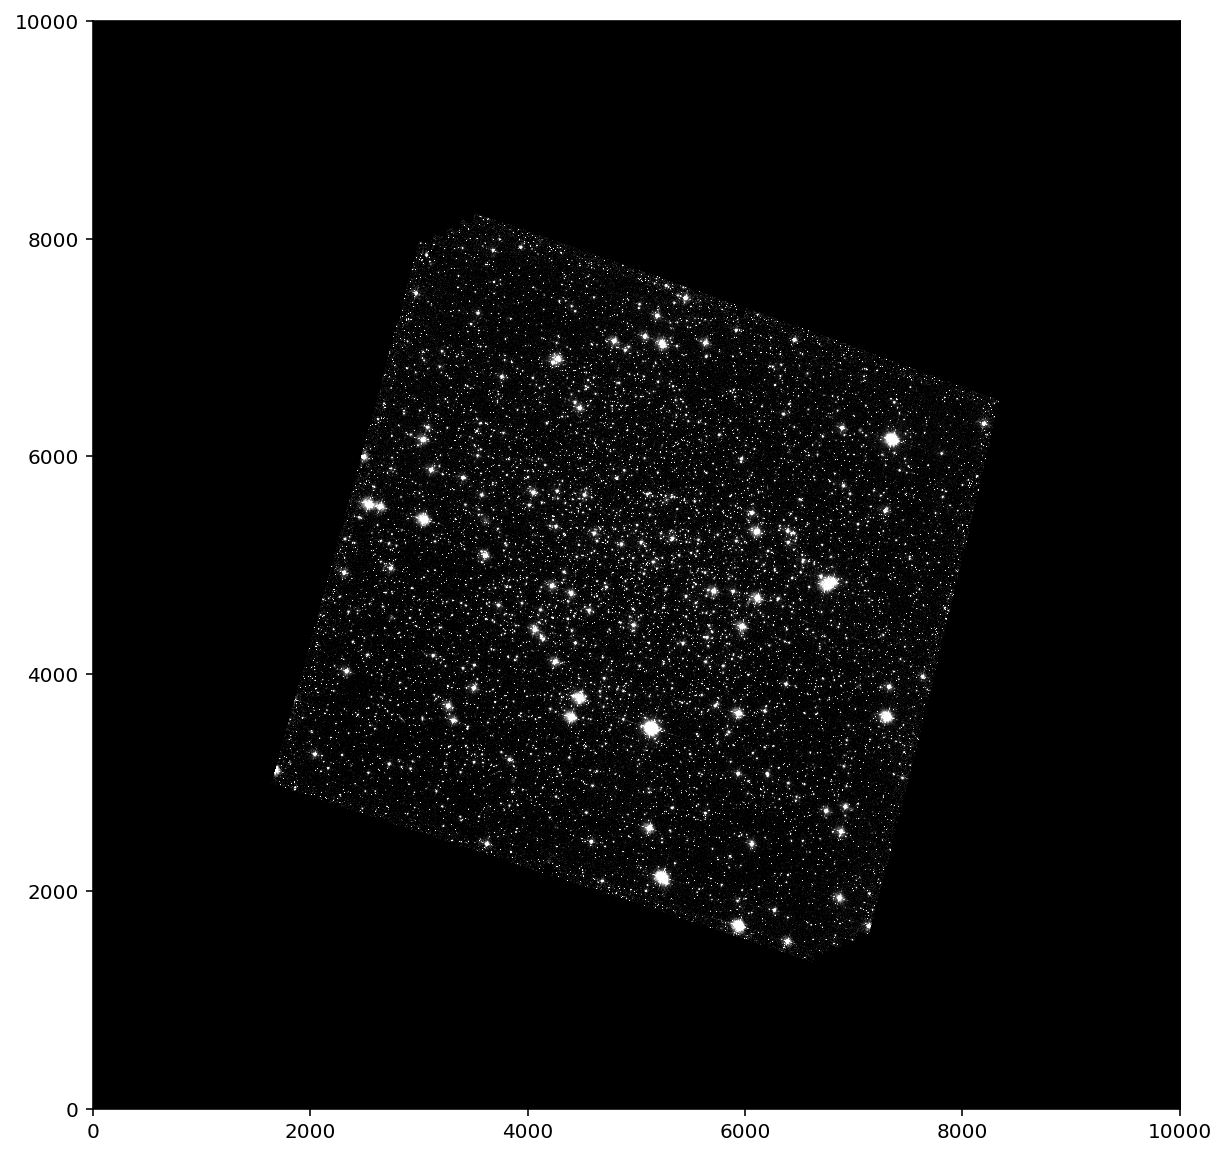

In [4]:
# make a plot and show the image
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')



Here, the `vmin` and `vmax` arguments in `imshow` tell matplotlib to map all pixels in the image that have a value of 0 or less to black, and all pixels in the image that have a value of 0.2 or more to white. The `origin` argument tells matplotlib to orient the image so that the (0,0) pixel coordinate is at the lower left corner (the default is the upper left, which works for most image file types like PNG and JPEG, but not FITS).

Now let's zoom in on the middle and take a closer look.

(4500, 5000)

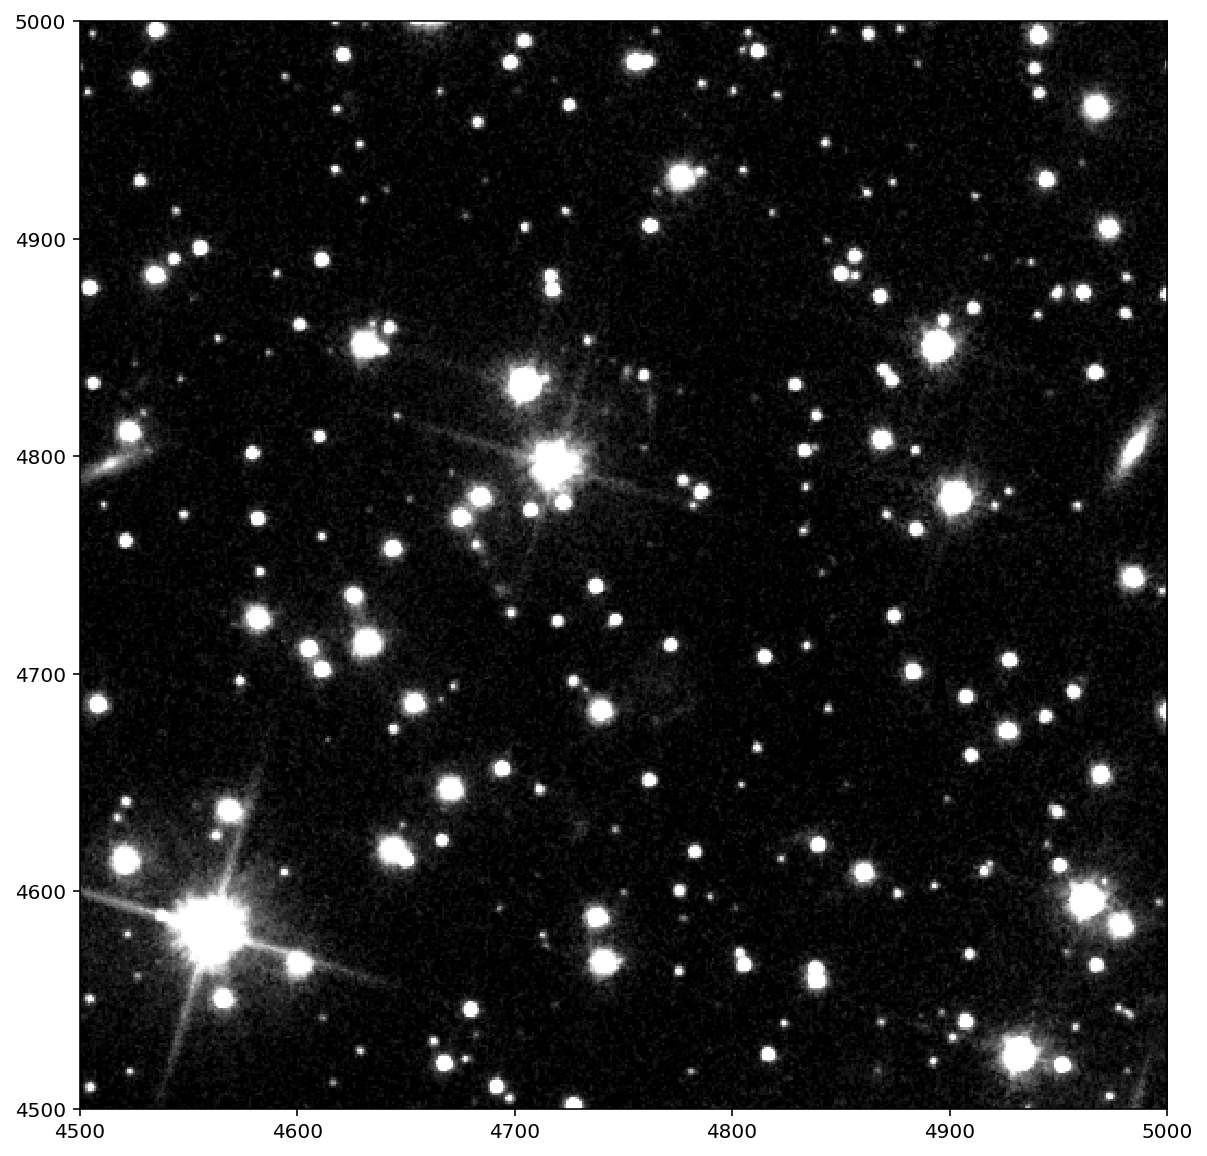

In [5]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
ax.set_xlim(4500,5000) # constrains the x-axis of the plot to the middle 1000 pixels of the 10,000x10,000 image 
ax.set_ylim(4500,5000) # same for the y-axis

In [6]:
# make a new zoomed-in sample
data_sample = data_blue[4500:5500,4500:5500]
# same data; just smaller
#object threshold is the minimum value that's considered to be not the backgrounds
#(detraction)
object_threshold = 1*data_sample.std()
print(object_threshold)

2.223548650741577


In [7]:
# looks at the entire blue mage (data_blue), not just data sample
# find al objects in the data that are brighter than the "object_threshold"
objects = sep.extract(data_blue, thresh=object_threshold)
#x, y are x/y coordinates of the objects
x, y = objects['x'], objects['y']

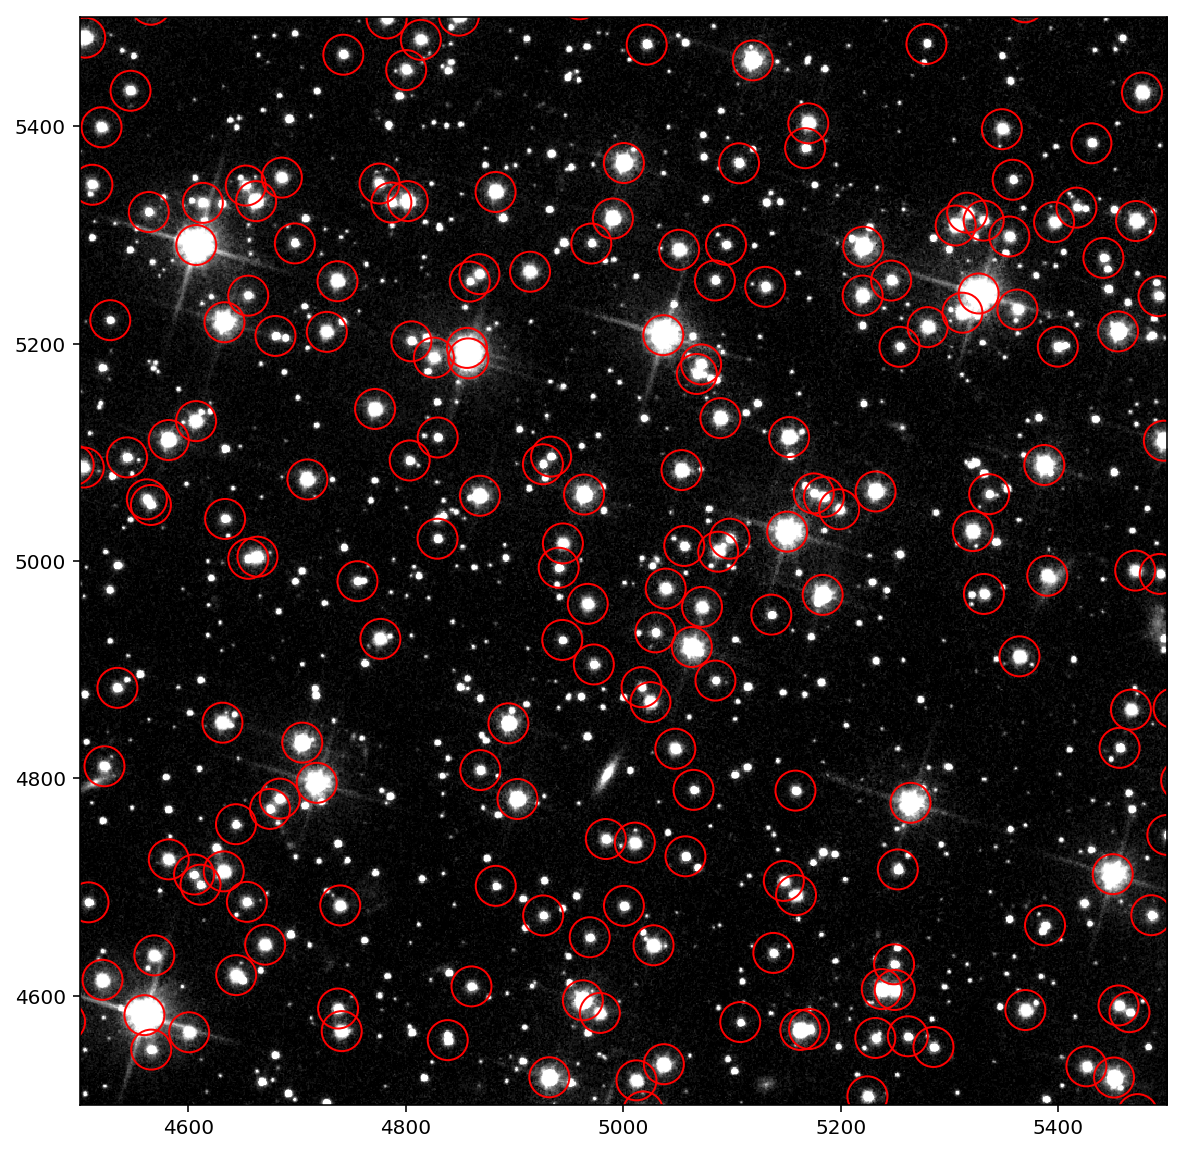

In [8]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
ax.set_xlim(4500,5500)
ax.set_ylim(4500,5500)
# this is the x/y positions of the bright objects found in the cell above
ax.scatter(x, y, color="None", edgecolors='red', s=20**2)

In [9]:
# now that we have all the circles...
# calculate the sum of the flux in each circle
#now we know the brightness of each star (assuming they're stars)
flux, fluxerr, flag = sep.sum_circle(data_blue, x, y, 20)
# the "20" is the radius

In [10]:
# this is a way of storing the data
object_table = Table(names=['x', 'y', 'flux'],
                     data=[x, y, flux])
object_table

<Table length=3938>
        x                  y                 flux       
     float64            float64            float64      
------------------ ------------------ ------------------
 6701.655539381309 1426.5547439232605  62.27742252815515
 6356.074318659438 1501.3421922882203 180.36568945359443
 6355.819966849029  1521.160020726212 160.69173410251736
 6808.407085244977 1521.2293240231875 444.31475181799374
 6769.471490258164 1523.1435847693301   583.598925877363
 6522.800283476645 1525.2001814287478 119.74293351940808
 6709.605211227038  1528.478901718243 1325.6781179566308
 6540.271370888803 1539.9356386079978 135.33697815768429
 6051.135116523792 1543.8773853648338  56.16888850443067
 6345.626129430289 1543.9770410033213 1742.5380118551107
               ...                ...                ...
3568.9588921936665  8044.682747696719  649.2180365946515
 3719.538726110422  8044.691231773133  3574.294984040335
 3759.485377569712  8054.945657540778  74.26053368270394
3732.5961641100407   8054.84710326602 3574.0497395970297
 3522.297335925705  8127.455091280127 1787.2830823418499
3756.0005971765777  8149.769072733221 40.732355927824976
 3588.985263273267  8172.705334191824  73.19306696392597
 3624.384644378391  8178.376023771747 231.73235662393276
3634.9104251017407  8180.204184989151 236.78453444018956
3563.2665005483136  8204.684044297792 150.90302338305858

In [11]:
# this line saves the table to a file named "NGC053_blue_stars_txt"
object_table.write('NGC5053_blue_stars.txt', format='ascii', overwrite=True)

## Your turn: do the same thing for the red image.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import sep

In [13]:
# read the data into an in-memory array we can do calculations on
data_red = fits.getdata('data/NGC5053_red.fits').byteswap().newbyteorder()

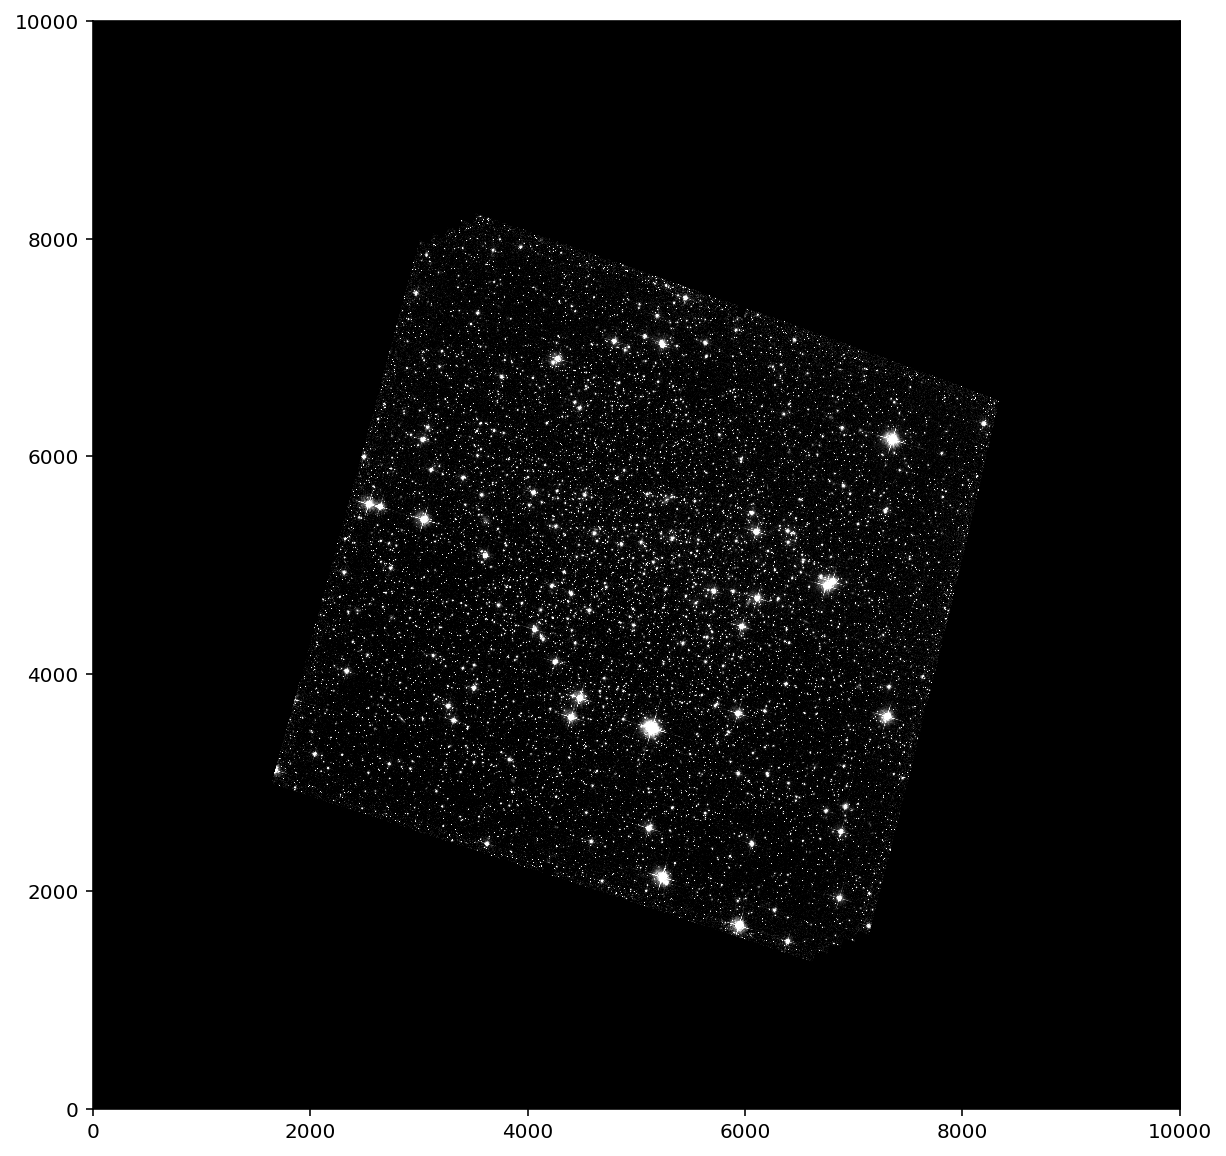

In [14]:
# make a plot and show the image
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_red, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')

(4500, 5000)

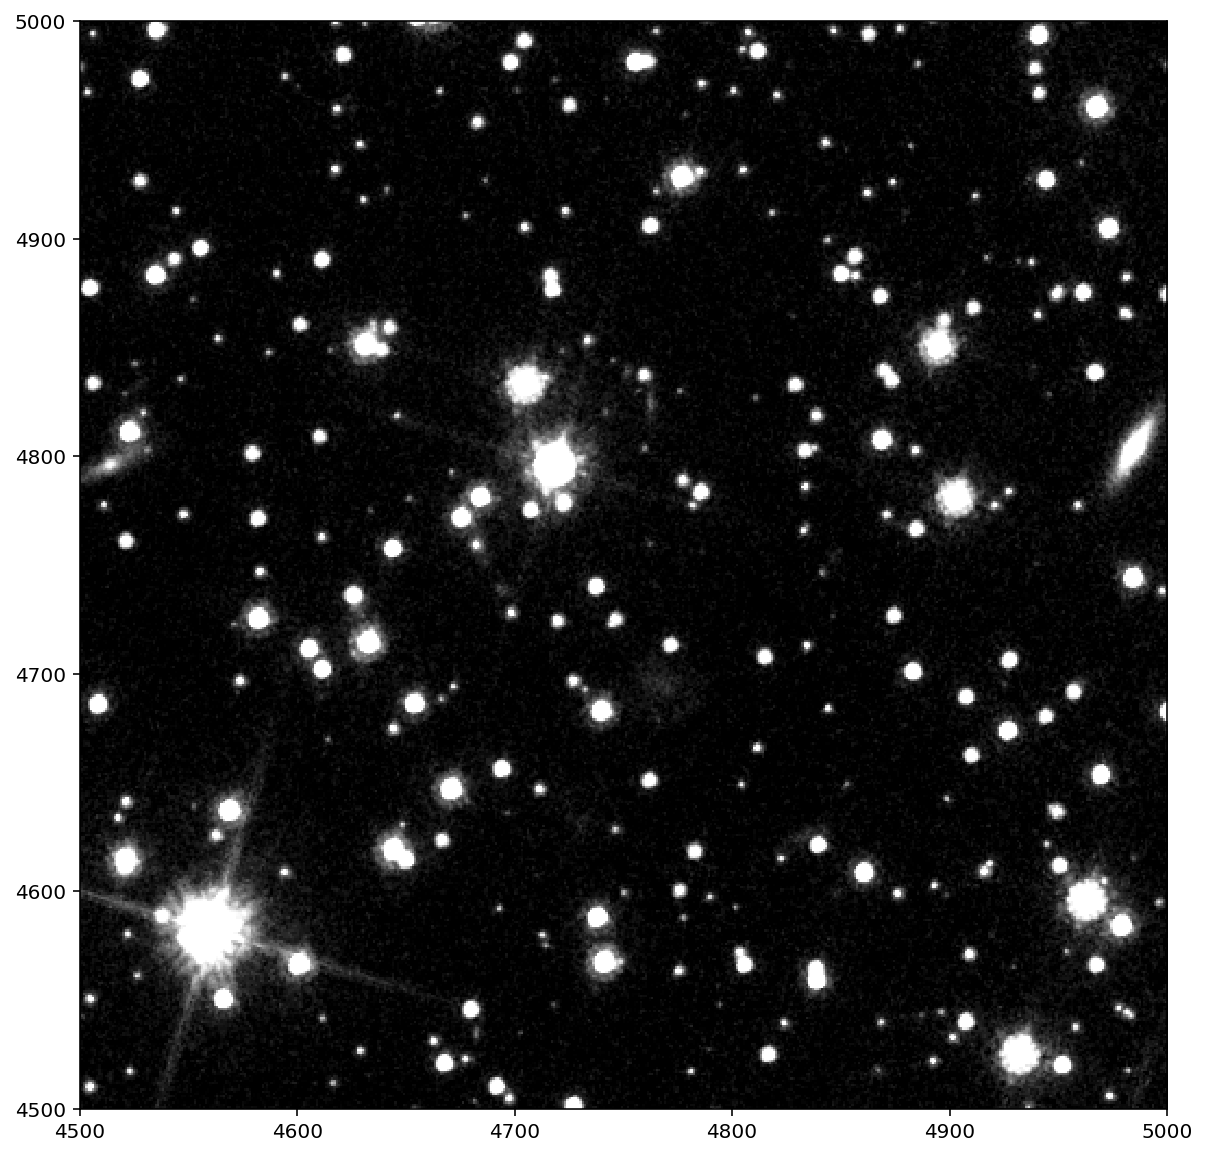

In [15]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_red, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
ax.set_xlim(4500,5000) # constrains the x-axis of the plot to the middle 1000 pixels of the 10,000x10,000 image 
ax.set_ylim(4500,5000) # same for the y-axis

In [16]:
# make a new zoomed-in sample
data_sample = data_red[4500:5500,4500:5500]
# same data; just smaller
#object threshold is the minimum value that's considered to be not the backgrounds
#(detraction)
object_threshold = 1*data_sample.std()
print(object_threshold)

1.8063170909881592


In [17]:
# looks at the entire blue mage (data_blue), not just data sample
# find al objects in the data that are brighter than the "object_threshold"
objects = sep.extract(data_red, thresh=object_threshold)
#x, y are x/y coordinates of the objects
x, y = objects['x'], objects['y']

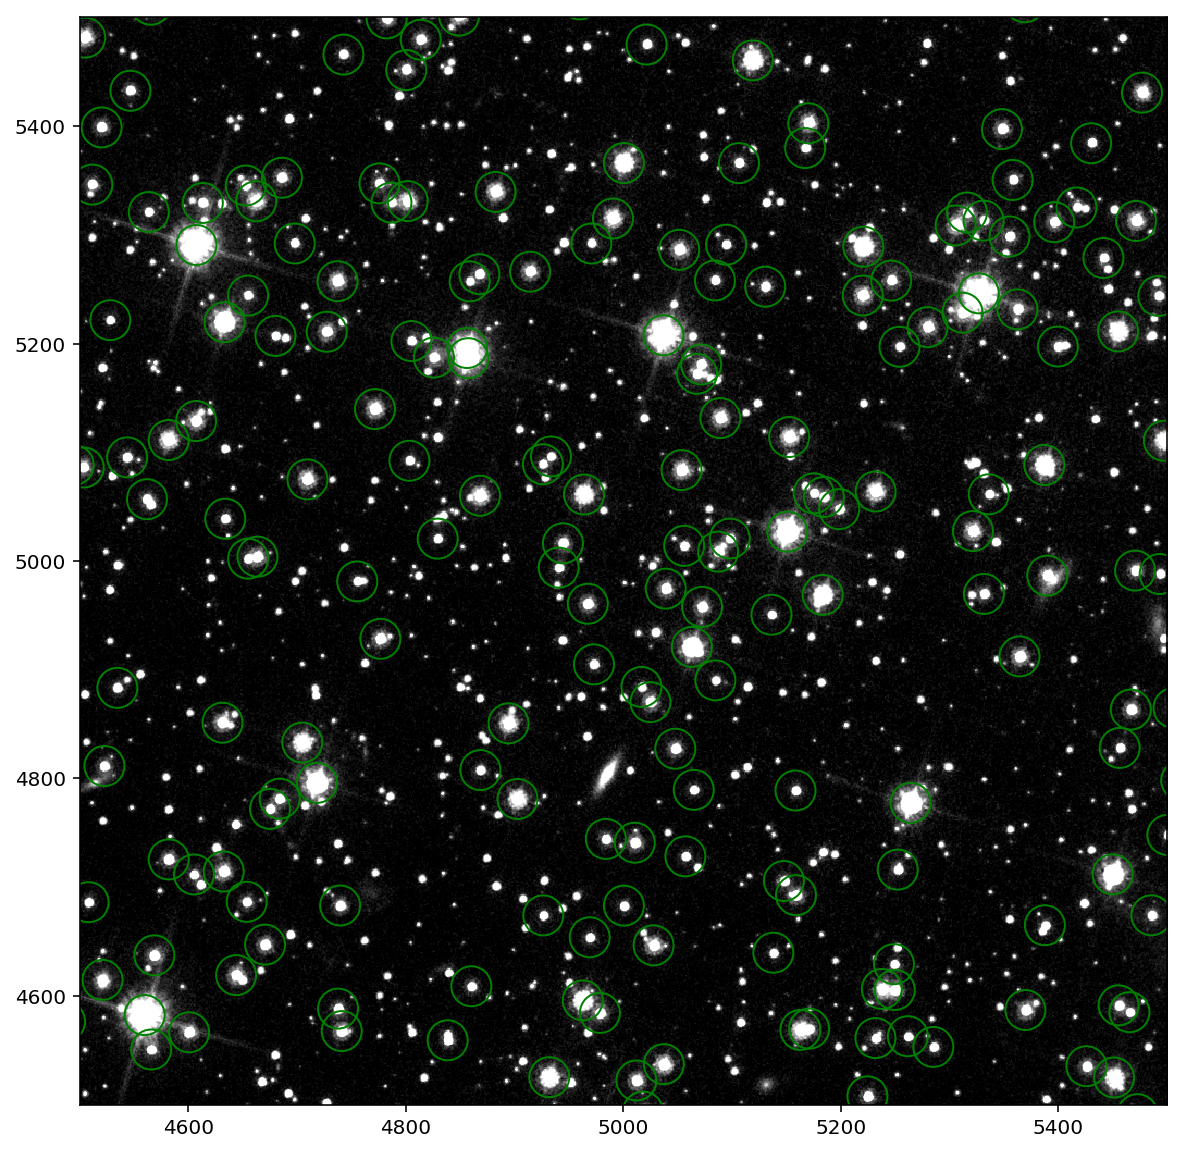

In [18]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_red, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
ax.set_xlim(4500,5500)
ax.set_ylim(4500,5500)
# this is the x/y positions of the bright objects found in the cell above
ax.scatter(x, y, color="None", edgecolors='green', s=20**2)

In [19]:
# now that we have all the circles...
# calculate the sum of the flux in each circle
#now we know the brightness of each star (assuming they're stars)
flux, fluxerr, flag = sep.sum_circle(data_red, x, y, 20)

In [20]:
# this is a way of storing the data
object_table = Table(names=['x', 'y', 'flux'],
                     data=[x, y, flux])
object_table

<Table length=3703>
        x                  y                 flux       
     float64            float64            float64      
------------------ ------------------ ------------------
 6562.189103639731 1379.6417333576885 131.11528913736342
 6553.586121529473 1390.8266163055625 136.52444466926156
 6606.145730702773 1411.1472826607437  31.25768902532757
 6542.638611412657 1419.2421891089725  313.2256923151762
 6556.944427511325 1440.6118994294293 53.513422815240936
 6297.384094614246 1483.4042558122264  88.29342061337087
  6489.95065341738 1491.4742619518472  1031.484165962488
 6356.001671806257 1501.2606801801687  93.38640003226703
  6478.50533055913 1500.4193601130373 1042.0796326605232
 6766.946818616011 1509.5093585795898 1331.0668249972168
               ...                ...                ...
 3251.147790570676  8052.195282351181 28.175911125354467
3572.7154466865018  8054.257209468017  387.7712916721773
3496.6833485558254  8076.772520702488  1153.372691688612
3461.8005849691044  8117.438951419194  81.55991080541165
3769.6859887803616  8117.989366094274  48.43680037833751
 3588.988669441918 8172.7071584541545  90.17191010575745
3624.3475630451776  8178.161359300669 165.25271188132467
3585.2837700652954  8179.993799465584  90.72355455502867
 3635.097320355086  8180.148321267255  170.5666674337909
 3563.029141116699  8204.927455450219 113.63964467588808

In [21]:
# this line saves the table to a file named "NGC053_red_stars_txt"
object_table.write('NGC5053_red_stars.txt', format='ascii', overwrite=True)



In [22]:
dataDifference = (data_blue) - (data_red)

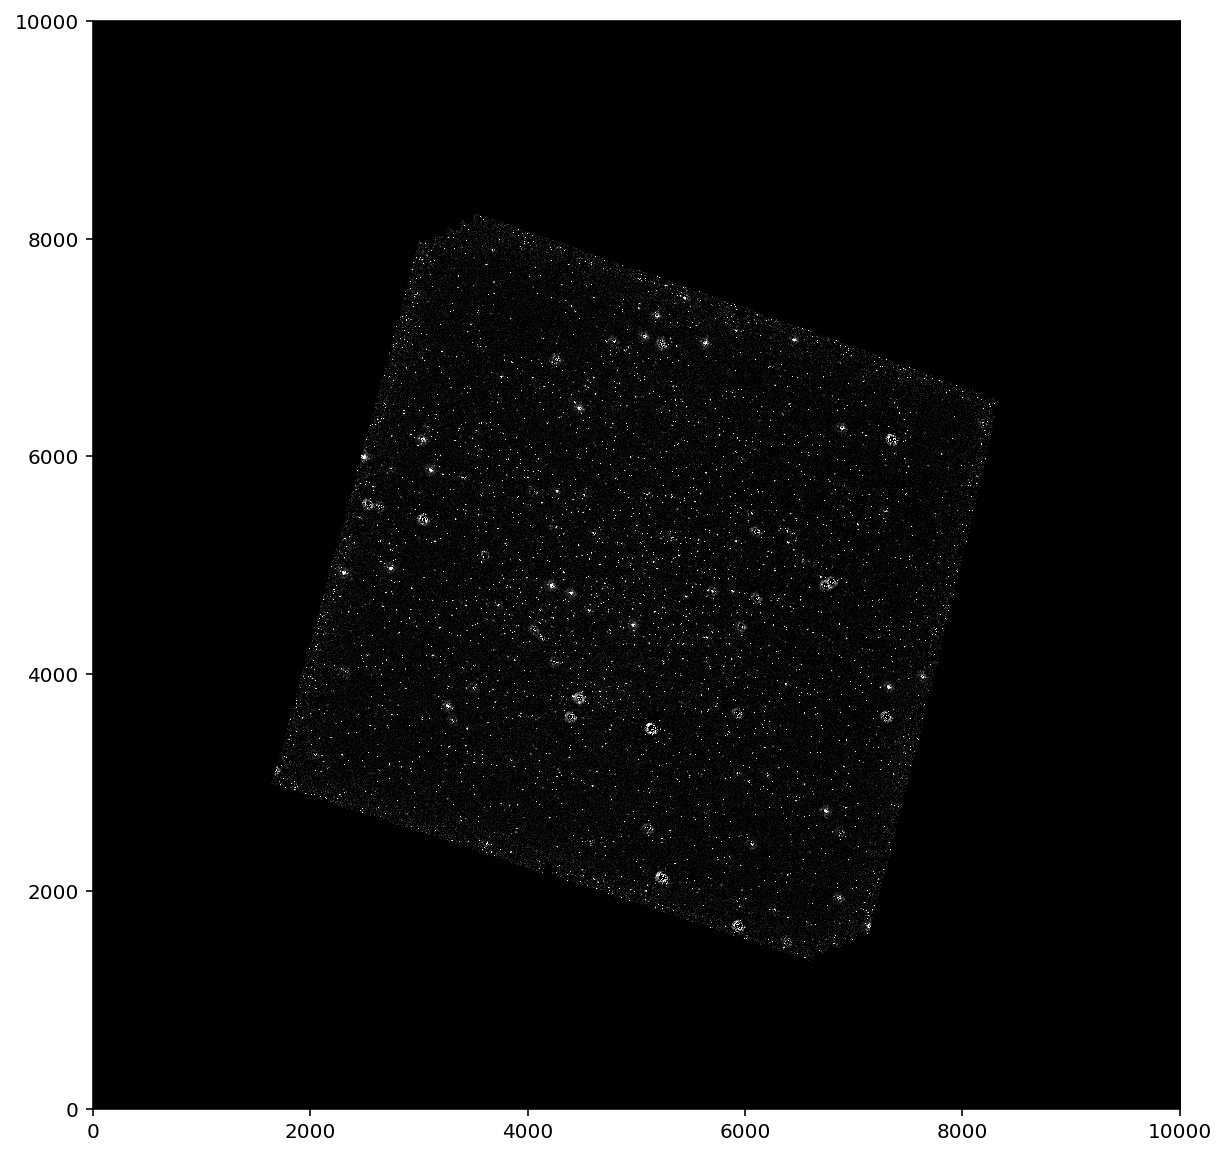

In [23]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(dataDifference, vmin=0, vmax=0.2, cmap='Greys_r', origin='lower')
